# Pandas for Pros!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the data

Today we're going to look at translation data for the SARS-CoV-2 virus from [Finkel et al. Nature (2020)](https://www.nature.com/articles/s41586-020-2739-1). We have access to plenty of data about SARS-CoV-2 that will help us explore this data. We'll just focus on two publically available files:
- the annotations (downloaded from [NCBI RefSeq](https://www.ncbi.nlm.nih.gov/sars-cov-2/))
- the ribosome profiling density reported in the study (downloaded from [GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE149973))

Let's take a look at our downloaded input data files so we know how to load them. Preview the files using the command line argument `!head`

In [2]:
# Check out GTF file format: https://useast.ensembl.org/info/website/upload/gff.html
!head sarscov2_annotations.gtf

#!genome-build ASM985889v3
#!genome-version ASM985889v3
#!genome-date 2020-01
#!genome-build-accession NCBI:GCA_009858895.3
MN908947.3	ensembl	gene	266	21555	.	+	.	gene_id "ENSSASG00005000002"; gene_version "1"; gene_name "ORF1ab"; gene_source "ensembl"; gene_biotype "protein_coding";
MN908947.3	ensembl	transcript	266	21555	.	+	.	gene_id "ENSSASG00005000002"; gene_version "1"; transcript_id "ENSSAST00005000002"; transcript_version "1"; gene_name "ORF1ab"; gene_source "ensembl"; gene_biotype "protein_coding"; transcript_name "ORF1ab"; transcript_source "ensembl"; transcript_biotype "protein_coding";
MN908947.3	ensembl	exon	266	21555	.	+	.	gene_id "ENSSASG00005000002"; gene_version "1"; transcript_id "ENSSAST00005000002"; transcript_version "1"; exon_number "1"; gene_name "ORF1ab"; gene_source "ensembl"; gene_biotype "protein_coding"; transcript_name "ORF1ab"; transcript_source "ensembl"; transcript_biotype "protein_coding"; exon_id "ENSSASE00005000002"; exon_version "1";
MN908947.3	ense

In [3]:
# Check out wig file format: https://m.ensembl.org/info/website/upload/wig.html
!head 24hr_riboseq.wig

variableStep chrom=NC_045512.2
13	28.000000
14	415.000000
15	316.000000
16	350.000000
17	133.000000
18	153.000000
19	390.000000
20	258.000000
21	37.000000


## Load the data

In [4]:
# Set the input file names
annotations_file = 'sarscov2_annotations.gtf'
riboseq_05hr_file = '05hr_riboseq.wig'
riboseq_07hr_file = '07hr_riboseq.wig'
riboseq_24hr_file = '24hr_riboseq.wig'

### Create a dataframe

We can read in data with:
- `pd.read_csv(filename)` for a comma separated file 
- `pd.read_table(filename)` for a tab separated file
- `pd.read_table(filename, sep='')` for any separator we choose 

Check out the [documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_table.html) to decide which additional arguments we need to read in both files. Useful optional arguments include:
- `comment=None` (default) or `comment='#'`
- `header=1` (default) or `header=None`
- `skiprows=None` (default) or `skiprows=1`
- `names=['col1', 'col2']`


In [5]:
# Read in the annotations

# Set the column names
feature_names = ['chromosome','source','feature','start','end','score','strand','frame','attributes']

# Read the table into a dataframe
annotations = pd.read_table(annotations_file, comment='#', header=None, names=feature_names)

annotations

,chromosome,source,feature,start,end,score,strand,frame,attributes
0,MN908947.3,ensembl,gene,266,21555,.,+,.,"gene_id ""ENSSASG00005000002""; gene_version ""1""..."
1,MN908947.3,ensembl,transcript,266,21555,.,+,.,"gene_id ""ENSSASG00005000002""; gene_version ""1""..."
2,MN908947.3,ensembl,exon,266,21555,.,+,.,"gene_id ""ENSSASG00005000002""; gene_version ""1""..."
3,MN908947.3,ensembl,CDS,266,21552,.,+,0,"gene_id ""ENSSASG00005000002""; gene_version ""1""..."
4,MN908947.3,ensembl,start_codon,266,268,.,+,0,"gene_id ""ENSSASG00005000002""; gene_version ""1""..."
...,...,...,...,...,...,...,...,...,...
67,MN908947.3,ensembl,transcript,29558,29674,.,+,.,"gene_id ""ENSSASG00005000013""; gene_version ""1""..."
68,MN908947.3,ensembl,exon,29558,29674,.,+,.,"gene_id ""ENSSASG00005000013""; gene_version ""1""..."
69,MN908947.3,ensembl,CDS,29558,29671,.,+,0,"gene_id ""ENSSASG00005000013""; gene_version ""1""..."
70,MN908947.3,ensembl,start_codon,29558,29560,.,+,0,"gene_id ""ENSSASG00005000013""; gene_version ""1""..."


### Set the dataframe index

Another useful trick is setting and resetting the index (or the row names).

To set the index:
- `df.set_index('col', inplace=True)` to set an existing column as the index
- `df.reindex([value1, value2])` to set a new list of values as the index (the list of values must be the same length as the dataframe)

To remove the index:
- `df.reset_index(inplace=True)` to move the index column back into the dataframe
- `df.reset_index(drop=True, inplace=True)` to remove the index column completely


In [6]:
# Read in the ribo-seq data

# Set the column names
feature_names = ['position','reads']

# Read the table into a dataframe
riboseq_05hr = pd.read_table(riboseq_05hr_file, skiprows=1, header=None, names=feature_names)
riboseq_07hr = pd.read_table(riboseq_07hr_file, skiprows=1, header=None, names=feature_names)
riboseq_24hr = pd.read_table(riboseq_24hr_file, skiprows=1, header=None, names=feature_names)

# Set the index to be the positions column
riboseq_05hr.set_index('position', inplace=True)
riboseq_07hr.set_index('position', inplace=True)
riboseq_24hr.set_index('position', inplace=True)

riboseq_24hr

,reads
position,
13,28.0
14,415.0
15,316.0
16,350.0
17,133.0
...,...
29865,1.0
29866,2.0
29867,1.0


## Clean the data

### Remove extra info

It's useful to clean up our data before we do any analysis or plotting. This includes:
- splitting up any columns that contain multiple values or mixed data types
- removing rows we don't need
- removing columns we don't need

To clean up columns with multiple values:
- `df['col'].str` to access the column value as a string
- `str.extract(r'regex')` to search for values that match a pattern in the string
- `str.split()` to split the string on whitespace (default) or any other separator
- `str[0]` to access a specific element of a split string
- `str[0:5]` to get a substring of the string

To remove rows:
- `df.drop(rows=['row1','row2'], inplace=True)` to drop rows by index name (useful if you set named indices)
- `df[df['col']==value]` to create a view of the dataframe with the desired rows filtered by value
- `df.copy()` to create a copy of the filtered dataframe we can actually use

To remove columns:
- `df.drop(columns=['col1','col2'], inplace=True)` to drop columns by column name

In [7]:
# Clean up the annotations dataframe

# Replace the attributes column with a transcript_id column and a gene name column
annotations['transcript_id'] = annotations['attributes'].str.extract(r'(ENSSAST[^"]*)')
annotations['gene'] = annotations['attributes'].str.extract(r'(name "[^"]*")')
annotations['gene'] = annotations['gene'].str.split().str[1].str[1:-1]

# Remove rows we don't need (keep only transcript features)
annotations = annotations[annotations['feature']=='transcript'].copy()

# Remove columns we don't need (chromosome, source, score, strand, frame, attributes, feature, transcript_id)
annotations.drop(columns=['chromosome','source','score','strand','frame','attributes','feature','transcript_id'], inplace=True)

annotations

,start,end,gene
1,266,21555,ORF1ab
7,266,13483,ORF1ab
13,21563,25384,S
19,25393,26220,ORF3a
25,26245,26472,E
31,26523,27191,M
37,27202,27387,ORF6
43,27394,27759,ORF7a
49,27756,27887,ORF7b
55,27894,28259,ORF8


### Add missing info

Sometimes we might also need to add in missing data by:
- filling NaN values with meaningful values
- adding new rows
- adding new columns

To fill NaN values:
- `df.fillna(value)` to fill the whole dataframe's missing values
- `df['col'].fillna(value)` to fill a specific column's missing values

To add new rows:
- `df.append(df2), ignore_index=True` to append a dataframe with new rows
- `df.reindex([value1, value2])` to add rows for all index values specified
- `df.reindex([value1, value2], fill_value=0)` to add rows for all index values specified and fill missing values

To add new columns:
- `df['col'] = value` to add a column with a single value for all rows
- `df['col'] = [value1, value2]` to add a column with the specified values (the list of values must be the same length as the dataframe)


In [8]:
# Clean up the riboseq dataframe

# Add the missing positions to each dataframe, from one to the max genome position
pos_max = annotations['end'].max()
new_index = range(1,pos_max+1,1)

# Reindex the dataframe with this new index
riboseq_05hr = riboseq_05hr.reindex(new_index, fill_value=0)
riboseq_07hr = riboseq_07hr.reindex(new_index, fill_value=0)
riboseq_24hr = riboseq_24hr.reindex(new_index, fill_value=0)

# Add a column with the timepoint in hrs (5, 7, or 24)
riboseq_05hr['timepoint'] = 5
riboseq_07hr['timepoint'] = 7
riboseq_24hr['timepoint'] = 24

riboseq_24hr

,reads,timepoint
position,,
1,0.0,24
2,0.0,24
3,0.0,24
4,0.0,24
5,0.0,24
...,...,...
29670,3131.0,24
29671,1360.0,24
29672,1085.0,24


## Combine the data

### Apply a function to the dataframe

Often we want to run a function on one or more columns or rows of a dataframe.

To apply a custom or existing function a dataframe:
- `df.apply(fxn, axis=0)` to apply the function to each column
- `df.apply(fxn, axis=1)` to apply the function to each row

In [9]:
# Add a column with the full range of transcript coordinates for each transcript

# Write a function to return the range of values from start to end+1 for a given row
def feature_range(row):
    return range(row['start'], row['end']+1)

# Add a position column with the list of all positions from start to end for each row
annotations['position'] = annotations.apply(feature_range, axis=1)

### Explode the dataframe

In the case of biological data, it can occasionally be helpful to add one row for each position of a sequence. In this case, we want to add one row per transceript position.

Explode a dataframe to have one row for each value in a list:
- `df.explode('col')` to add one row per value in the column list


In [10]:
# Reformat the annotations dataframe to include one row per transcript position
# so that we can merge it with the riboseq dataframe

# Explode the dataframe to have one row per position
annotations = annotations.explode('position')

# Make the positions column the index
annotations.set_index('position', inplace=True)

# Remove columns we don't need anymore (start, end)
annotations.drop(columns=['start', 'end'], inplace=True)

annotations

,gene
position,
266,ORF1ab
267,ORF1ab
268,ORF1ab
269,ORF1ab
270,ORF1ab
...,...
29670,ORF10
29671,ORF10
29672,ORF10


### Concatenate dataframes

Frequently, we want to append dataframes together to combine multiple datasets.

Concatenate two or more dataframes:
- `pd.concat([df1, df2, df3], axis=0)` to stack the dataframes one on top of the other
- `pd.concat([df1, df2, df3], axis=1)` to glue the dataframes side by side

In [11]:
# Combine all the riboseq dataframes into a single dataframe
# so that we can merge it with the annotations dataframe

# Concatenate all three riboseq dataframes
riboseq = pd.concat([riboseq_05hr, riboseq_07hr, riboseq_24hr])

riboseq

,reads,timepoint
position,,
1,0.0,5
2,0.0,5
3,0.0,5
4,0.0,5
5,0.0,5
...,...,...
29670,3131.0,24
29671,1360.0,24
29672,1085.0,24


### Merge dataframes

And perhaps the most useful way to combine dataframes is merging. We can merge any two dataframes that share one or more column names.

Merge two dataframes:
- `pd.merge(df1, df2, on='col', how='left')` to merge on one column and keep all values from df1 in that column
- `pd.merge(df1, df2, on='col', how='right')` to merge on one column and keep all values from df2 in that column
- `pd.merge(df1, df2, on='col', how='inner')` to merge on one column and keep all values shared by both dfs
- `pd.merge(df1, df2, on='col', how='outer')` to merge on one column and keep all values in either df
- `pd.merge(df1, df2, on=['col1','col2']')` to merge on multiple columns

And don't forget we can make sure our datatypes are what we expect after merging:
- `df.astype({'col1':'int', 'col2':'float})`


In [12]:
# Merge the annotations and riboseq dataframes into a single dataframe

# Merge the two dataframes on the position columns, keep all positions in the annotations dataframe
merged_data = pd.merge(annotations, riboseq, on='position', how='left')

# Make sure the data types are what we want for each column (reads: float, timepoint: int)
merged_data.astype({'reads': 'float', 'timepoint':'int'})

# Reset the index so position is a column we can access
merged_data.reset_index(inplace=True)

merged_data

,position,gene,reads,timepoint
0,266,ORF1ab,11.0,5
1,266,ORF1ab,11.0,7
2,266,ORF1ab,95.0,24
3,267,ORF1ab,75.0,5
4,267,ORF1ab,296.0,7
...,...,...,...,...
127441,29673,ORF10,5.0,7
127442,29673,ORF10,937.0,24
127443,29674,ORF10,0.0,5
127444,29674,ORF10,1.0,7


## Transform the data

We can calculate new columns from transformations of existing columns. Often this involves grouping the data by some feature and calculating a value of each group. Or it may be a row-by-row calculation.

Calculate a new value per group:
- `df.groupby(['col1','col2'])['col3'].transform('count')` to create a new column with the number of elements in each group
- `df.groupby(['col1','col2'])['col3'].transform('mean')` to create a new column with the mean of each group

Clauclate a new value per row:
- `df['new_col'] = np.log(df['col1'])` to create a new column with the log of an existing column
- `df['new_col'] = df['col1'] / df['col2']` to create a new column normalizing one column by another

In [13]:
# Normalize the reads by the mean reads per gene

# Add a column with the mean reads per gene for each timepoint
merged_data['mean_reads'] = merged_data.groupby(['gene','timepoint'])['reads'].transform('mean')

# Add a column with the reads normalized by mean reads per transcript
merged_data['norm_reads'] = merged_data['reads'] / merged_data['mean_reads']

# Add a column with the log of normalized reads (plus a pseudocount of 1)
merged_data['log_norm_reads'] = np.log(merged_data['norm_reads']+1)

merged_data

,position,gene,reads,timepoint,mean_reads,norm_reads,log_norm_reads
0,266,ORF1ab,11.0,5,0.683523,16.093102,2.838675
1,266,ORF1ab,11.0,7,1.288513,8.536974,2.255176
2,266,ORF1ab,95.0,24,421.791005,0.225230,0.203129
3,267,ORF1ab,75.0,5,0.683523,109.725696,4.707056
4,267,ORF1ab,296.0,7,1.288513,229.722202,5.441214
...,...,...,...,...,...,...,...
127441,29673,ORF10,5.0,7,2.897436,1.725664,1.002712
127442,29673,ORF10,937.0,24,3740.632479,0.250492,0.223537
127443,29674,ORF10,0.0,5,2.119658,0.000000,0.000000
127444,29674,ORF10,1.0,7,2.897436,0.345133,0.296493


## Plot the data

### Seaborn styles

One of the best features of seaborn is that it defaults to making beautiful plots! But still gives you the ability to customize all the visuals.

Set the [color palette](https://matplotlib.org/stable/tutorials/colors/color1s.html), for example from these [creatively named colors](https://xkcd.com/color/rgb/):
- `sns.set_palette(sns.color_palette(colors))` to set a custom color palette

Set the [plot style](http://seaborn.pydata.org/tutorial/aesthetics.html):
- `sns.set_style('darkgrid')`
- `sns.set_style('whitegrid')`
- `sns.set_style('dark')`
- `sns.set_style('white')`
- `sns.set_style('ticks')`

Set the [context](http://seaborn.pydata.org/tutorial/aesthetics.html):
- `sns.set_context('notebook', font_scale=1.05)` to rescale the fonts for jupyter notebooks

In [14]:
#colors = ['#2E659D', '#CA4B4C', '#F0BF1A']
colors = ['xkcd:pastel red', 'xkcd:squash',  'xkcd:sun yellow', 'xkcd:off green', 'xkcd:dull teal', 
          'xkcd:faded blue', 'xkcd:denim blue', 'xkcd:light eggplant', 'xkcd:ugly pink', 'xkcd:grey']

sns.set_palette(sns.color_palette(colors))
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.05)

### Single plots

As discussed last week, we can make a seaborn plot from a dataframe pretty easily. Here's an overview and some example plot types that are especially useful.

Create a matplotlib figure:
- `fig1, ax1 = plt.subplots(figsize=(10,3))` to create a matplotlib figure and axes object of the given size

Create a [seaborn plot](https://seaborn.pydata.org/examples/index.html):
- `sns.scatterplot(data=df, x='col1', y='col2', hue='col3', ax=ax1)` to make a scatter plot
- `sns.lineplot(data=df, x='col1', y='col2', hue='col3', ax=ax1)` to make a line plot
- `sns.histplot(data=df, x='col1', hue='col3', ax=ax1)` to make a histogram
- `sns.stripplot(data=df, x='col1', y='col2', hue='col3', ax=ax1)` to make a categorial scatter plot
- `sns.boxplot(data=df, x='col1', y='col2', hue='col3', ax=ax1)` to make a categorical box plot
- `sns.barplot(data=df, x='col1', y='col2', hue='col3', ax=ax1)` to make a categorical bar plot

Customize axis limits:
- `ax1.set_xlim([0,10])` to force the x-axis limits to be 0 to 10
- `ax1.set_xylim([0,10])` to force the y-axis limits to be 0 to 10

Label the axes and plot:
- `ax1.set_xlabel('x')` to label the x-axis
- `ax1.set_ylabel('y')` to label the y-axis
- `ax1.set_title('plot', fontweight='bold', fontsize=14)` to label the plot

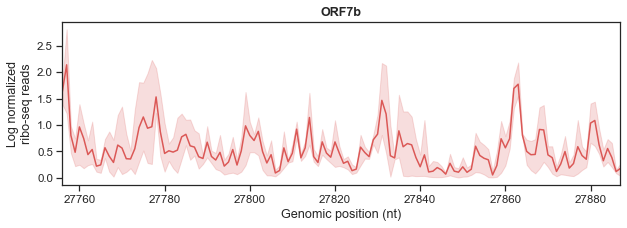

In [15]:
# Plot the log normalized reads over each position of the gene ORF7b

# Isolate the subset of data for one gene
plot_data = merged_data[merged_data['gene']=='ORF7b']

# Plot using sns.lineplot
fig1, ax1 = plt.subplots(figsize=(10,3))
sns.lineplot(data=plot_data, 
             x='position', 
             y='log_norm_reads', 
             markers=True, 
             ax=ax1)

# Update the limits
pos_min = plot_data['position'].min()
pos_max = plot_data['position'].max()
ax1.set_xlim([pos_min, pos_max])

# Upadate the labels
ax1.set_xlabel('Genomic position (nt)')
ax1.set_ylabel('Log normalized\nribo-seq reads')
ax1.set_title('ORF7b', fontweight='bold')

plt.show()

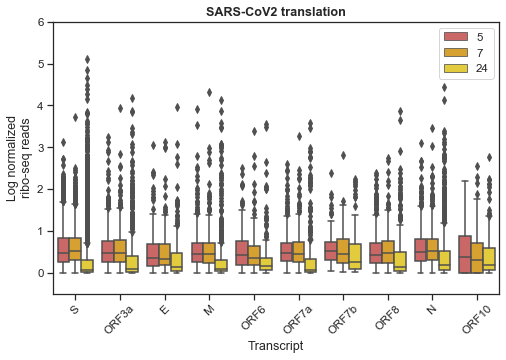

In [16]:
# Plot a summary of the read counts per gene

# Remove the longest gene so that we can plot the rest in a reasonable amount of time
sample_data = merged_data[merged_data['gene']!='ORF1ab']

# Plot a boxplot of the reads at each timepoint for each gene
fig2, ax2 = plt.subplots(figsize=(8,5))
sns.boxplot(data=sample_data, 
            x='gene', 
            y='log_norm_reads', 
            hue='timepoint', 
            ax=ax2)

# Update the limits
ax2.set_ylim([-0.5,6])

# Upadate the labels
plt.xticks(rotation=45)
ax2.set_xlabel('Transcript')
ax2.set_ylabel('Log normalized\nribo-seq reads')
ax2.set_title('SARS-CoV2 translation', fontweight='bold')

plt.legend(loc='upper right')
plt.show()

### Multipanel plots

Another strength of seaborn is making multipanel plots from a dataframe.

Create a [seaborn faceted plot](https://seaborn.pydata.org/examples/index.html):
- `sns.relplot(data=df, x='col1', y='col2', hue='col3', col='col4', col_wrap=5, kind='scatter')` to make a multipanel scatter plot
- `sns.relplot(data=df, x='col1', y='col2', hue='col3', col='col4', col_wrap=5, kind='line')` to make a multipanel line plot
- `sns.displot(data=df, x='col1', y='col2', hue='col3', col='col4', col_wrap=5, kind='hist')` to make a multipanel histogram
- `sns.catplot(data=df, x='col1', y='col2', hue='col3', col='col4', col_wrap=5, kind='strip')` to make a multipanel categorical scatter plot
- `sns.catplot(data=df, x='col1', y='col2', hue='col3', col='col4', col_wrap=5, kind='box')` to make a multipanel categorical box plot
- `sns.catplot(data=df, x='col1', y='col2', hue='col3', col='col4', col_wrap=5, kind='bar')` to make a multipanel categorical bar plot

Label the axes and plot:
- `g1.fig.set_axis_labels('x', 'y')` to label the x-axi and y-axis
- `g1.fig.subplots_adjust(top=0.9)` to add space at the top for a super-title
- `g1.fig.suptitle('plot', fontweight='bold', fontsize=14)` to label the plot with a a super-title

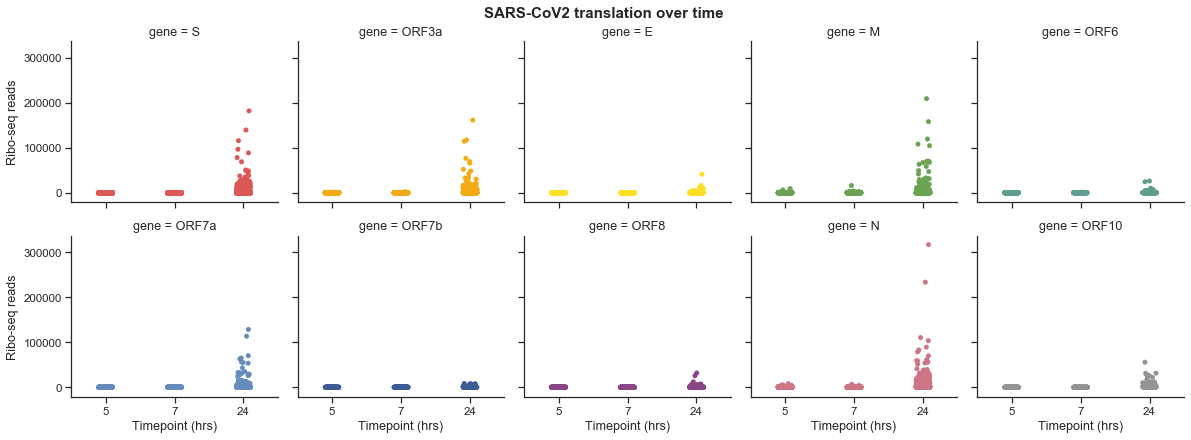

In [17]:
# Plot the mean reads over time for each gene

# Plot a lineplot of the mean reads at each timepoint for each gene
g3 = sns.catplot(data=sample_data,
                x='timepoint',
                y='reads',
                hue='gene', 
                col='gene',
                col_wrap=5,
                kind='strip',
                height=3,
                aspect=1.1)

# Upadate the labels
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle('SARS-CoV2 translation over time', fontweight='bold')
g3.set_axis_labels('Timepoint (hrs)', 'Ribo-seq reads')

plt.show()

# Tada!

Now you're Pandas and Seaborn pro. Just for a fun (and totally random) bonus, here's how you can make your own [xkcd style plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xkcd.html) in python!

### A word of caution

Pandas is an extremely powerful data science tool, but it is also extremely memory-hungry. As a rule of thumb, pandas requires 5x to 10x as much RAM as the size of the dataset you're loading.

![Pandas](https://uploads-ssl.webflow.com/5b6106c192c3f985a0cb3273/5cde13a9dd9cda26144a59fc_Panda.gif)